In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('scaled_filtered_24_4_10.csv')
display(df.head(10))

,Unnamed: 0,combat_id,start_time,number_of_rounds,player_ids,player_info,monsters_info,party_size,total_slots,total_max_slots,...,Cleric,Warlock,Ranger,Barbarian,Druid,Monk,Sorcerer,Rogue,weighted_monster_level,weighted_spell_slots
0,21,1653817902-15ec25a2-6757-4ceb-ac41-d44352b97705,1.653818e+09,1,['209330647903743785'],"[{'hp_ratio': (65, 65), 'class': [('Ranger', 1...",[{'monster_id': 'c0cdb522-64c2-42ee-b1a8-6ef22...,1,"{'1': 4, '2': 3, '3': 2, '4': 0, '5': 0, '6': ...","{'1': 4, '2': 3, '3': 2, '4': 0, '5': 0, '6': ...",...,0,0,1,0,0,0,0,0,4.0,139
1,14,1653869871-e7fd0606-de62-4688-a55b-ae4c25a14beb,1.653870e+09,2,['176588704091156599'],"[{'hp_ratio': (0, 38), 'class': [('Monk', 4), ...",[{'monster_id': '3bdb4cc1-6ca9-47e8-9610-d68ef...,1,"{'1': 2, '2': 0, '3': 0, '4': 0, '5': 0, '6': ...","{'1': 2, '2': 0, '3': 0, '4': 0, '5': 0, '6': ...",...,1,0,0,0,0,1,0,0,5.0,12
2,15,1653870265-3912208d-8851-4441-90a7-9473068eb93e,1.653870e+09,4,"['743069156064144035', '219174602203404794']","[{'hp_ratio': (33, 73), 'class': [('Druid', 9)...",[{'monster_id': '203bce70-7a28-4c79-a990-fba6f...,2,"{'1': 4, '2': 3, '3': 3, '4': 3, '5': 1, '6': ...","{'1': 7, '2': 3, '3': 3, '4': 3, '5': 1, '6': ...",...,1,0,0,1,1,0,0,0,4.0,367
3,18,1653872787-dd8c22a6-4f2b-46f9-901a-17c887a64f29,1.653873e+09,6,"['743069156064144035', '219174602203404794']","[{'hp_ratio': (61, 81), 'class': [('Barbarian'...",[{'monster_id': 'aed32ba7-a864-41ca-a4b3-1314d...,2,"{'1': 7, '2': 3, '3': 3, '4': 3, '5': 2, '6': ...","{'1': 7, '2': 3, '3': 3, '4': 3, '5': 2, '6': ...",...,1,0,0,1,1,0,0,0,12.0,449
4,32,1653896334-b9e6fdf9-8623-4f4f-999f-723261516a9f,1.653896e+09,2,"['244501817820067418', '252441296436920394', '...","[{'hp_ratio': (42, 47), 'class': [('Paladin', ...",[{'monster_id': '6acfea01-ab7a-4a14-b17c-e05a9...,4,"{'1': 18, '2': 11, '3': 5, '4': 3, '5': 2, '6'...","{'1': 19, '2': 11, '3': 5, '4': 3, '5': 2, '6'...",...,1,1,0,1,1,0,0,0,1.0,871
5,34,1653898977-2468e700-6ee0-4827-8d03-2315cb828041,1.653899e+09,2,"['244501817820067418', '252441296436920394', '...","[{'hp_ratio': (41, 47), 'class': [('Paladin', ...",[{'monster_id': '3132bb2e-464e-44ad-932c-cbdfb...,4,"{'1': 18, '2': 11, '3': 5, '4': 3, '5': 2, '6'...","{'1': 19, '2': 11, '3': 5, '4': 3, '5': 2, '6'...",...,1,1,0,1,1,0,0,0,5.0,871
6,46,1653924516-8d813715-7205-407d-ad04-35247e4f91f4,1.653925e+09,8,"['116270686338891460', '313872666094206309', '...","[{'hp_ratio': (15, 27), 'class': [('Ranger', 2...",[{'monster_id': 'c881f078-9a64-48bd-86a1-1c105...,5,"{'1': 7, '2': 4, '3': 0, '4': 0, '5': 0, '6': ...","{'1': 7, '2': 5, '3': 0, '4': 0, '5': 0, '6': ...",...,1,1,1,1,0,0,0,0,9.0,110
7,47,1653925023-6bbb2449-ecf9-448c-a31b-c3d3367c939d,1.653925e+09,5,"['545114601377345713', '193641129595148192', '...","[{'hp_ratio': (30, 36), 'class': [('Rogue', 3)...",[{'monster_id': '4d23eb72-48f7-4f2c-a2f9-979ba...,3,"{'1': 3, '2': 0, '3': 0, '4': 0, '5': 0, '6': ...","{'1': 3, '2': 0, '3': 0, '4': 0, '5': 0, '6': ...",...,0,1,1,0,0,0,0,1,1.5,18
8,49,1653931304-e7e532b1-cd41-46a8-a71c-435dbe1a4e9c,1.653931e+09,2,"['244501817820067418', '252441296436920394', '...","[{'hp_ratio': (41, 47), 'class': [('Paladin', ...",[{'monster_id': '70214ca2-4356-48ab-9052-c4293...,4,"{'1': 18, '2': 11, '3': 4, '4': 3, '5': 2, '6'...","{'1': 19, '2': 11, '3': 5, '4': 3, '5': 2, '6'...",...,1,1,0,1,1,0,0,0,40.0,839
9,51,1653933994-a44b833a-a23e-4772-acc3-fad0b754aba4,1.653934e+09,7,"['743069156064144035', '294037842287691462']","[{'hp_ratio': (12, 91), 'class': [('Barbarian'...",[{'monster_id': 'dc06fdfd-13f5-46ba-a82b-afc39...,2,"{'1': 4, '2': 0, '3': 0, '4': 0, '5': 0, '6': ...","{'1': 6, '2': 0, '3': 0, '4': 0, '5': 0, '6': ...",...,1,0,0,1,0,1,0,0,4.0,24


In [3]:
#lets apply some additional filters to the data
#no tpk so filtering the hp ratio to be between 0.05 qnd 1 to cut overhealing and the tpks
filtered_df= df[df['party_total_hpratio']<1]
filtered_df= filtered_df[filtered_df['party_total_hpratio']]
filtered_df = df[df['number_of_rounds'] > 1]

In [4]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")


Number of combats lost to the filter: 2497


In [5]:
filtered_df = filtered_df[filtered_df['party_size'] <= 10]

In [6]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")

Number of combats lost to the filter: 2497


In [7]:
filtered_df = filtered_df[filtered_df['party_total_level']/filtered_df['party_size']  <= 20]

In [8]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")

Number of combats lost to the filter: 2533


In [9]:
filtered_df = filtered_df[filtered_df['party_total_ac']/filtered_df['party_size']  <= 38]

In [10]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")

Number of combats lost to the filter: 2541


In [11]:
filtered_df = filtered_df[filtered_df['party_total_precombat_hp']/filtered_df['party_size'] <350]

In [12]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")

Number of combats lost to the filter: 2542


In [13]:
filtered_df['avg_party_level'] = filtered_df['party_total_level'] / filtered_df['party_size']
#filtered_df['avg_monster_level'] = filtered_df['monster_total_level'] / filtered_df['monster_number']
filtered_df['avg_hp_ratio'] = (filtered_df['party_total_precombat_hp']-filtered_df['party_total_postcombat_hp'])/ filtered_df['party_max_hp']


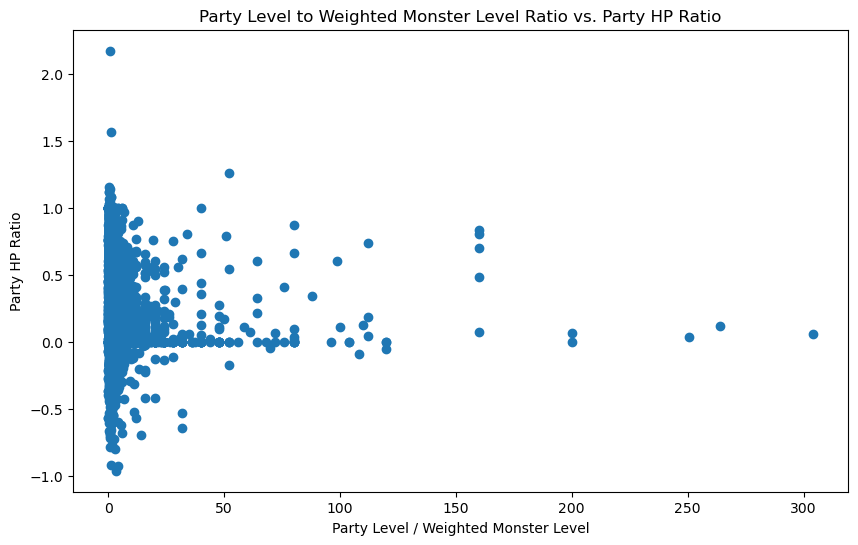

In [14]:
import matplotlib.pyplot as plt

filtered_df['weighted_monster_level'].replace(0, np.nan, inplace=True)

# Calculate the ratio of average party level to average monster level
filtered_df['level_ratio'] = filtered_df['party_total_level'] / filtered_df['weighted_monster_level']


plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['level_ratio'],filtered_df['avg_hp_ratio'])
plt.xlabel('Party Level / Weighted Monster Level')
plt.ylabel('Party HP Ratio')
plt.title('Party Level to Weighted Monster Level Ratio vs. Party HP Ratio')
plt.show()


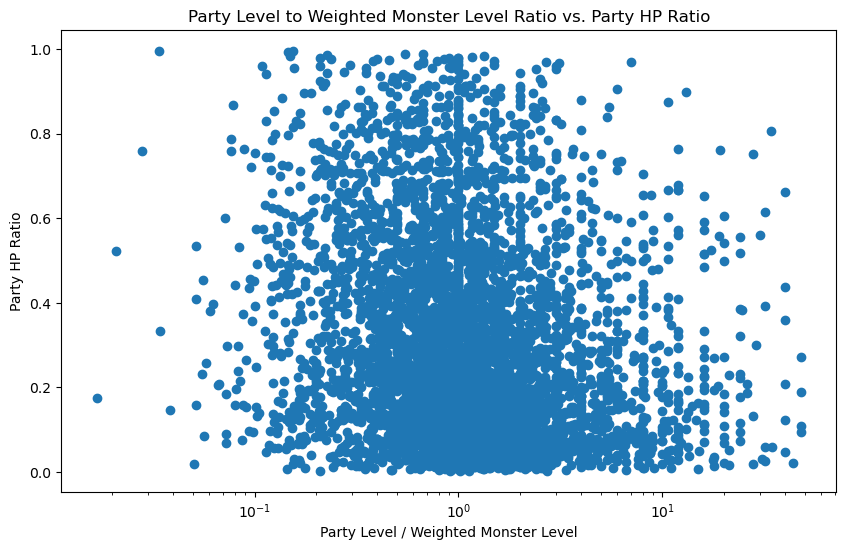

In [23]:


# extra filtering removing all the "outliers" , making the party more well matched to monster level
filtered_df = filtered_df[(filtered_df['avg_hp_ratio'] > 0)]
filtered_df = filtered_df[(filtered_df['avg_hp_ratio'] < 1)]
filtered_df = filtered_df[(filtered_df['level_ratio'] <50)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['level_ratio'],filtered_df['avg_hp_ratio'])
plt.xscale('log')
plt.xlabel('Party Level / Weighted Monster Level')
plt.ylabel('Party HP Ratio')
plt.title('Party Level to Weighted Monster Level Ratio vs. Party HP Ratio')
plt.show()

